In [1]:
import json
import numpy as np
import re
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
def report_statistics(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        total_followers = 0
        total_retweets = 0
        total_tweets = len(lines)
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
            total_followers += json_obj['author']['followers']
            total_retweets += json_obj['metrics']['citations']['total']
        avg_tweets_per_h = total_tweets * 3600 / (max_time - min_time)
        avg_followers_per_tweet = total_followers / total_tweets
        avg_retweets_per_tweet = total_retweets / total_tweets
        print(filename)
        print('Average number of tweets per hour: ', avg_tweets_per_h)
        print('Average number of followers of users posting the tweets per tweet: ',
              avg_followers_per_tweet)
        print('Average number of retweets per tweet: ', avg_retweets_per_tweet)
        print('-' * 50)

In [ ]:
files = ['/content/drive/MyDrive/ECE219/Project4/ECE219_tweet_data/tweets_#gohawks.txt', '/content/drive/MyDrive/ECE219/Project4/ECE219_tweet_data/tweets_#gopatriots.txt', 
         '/content/drive/MyDrive/ECE219/Project4/ECE219_tweet_data/tweets_#nfl.txt', '/content/drive/MyDrive/ECE219/Project4/ECE219_tweet_data/tweets_#patriots.txt', 
         '/content/drive/MyDrive/ECE219/Project4/ECE219_tweet_data/tweets_#sb49.txt', '/content/drive/MyDrive/ECE219/Project4/ECE219_tweet_data/tweets_#superbowl.txt']

for file in files:
    report_statistics(file)

/content/drive/MyDrive/ECE219/Project4/ECE219_tweet_data/tweets_#gohawks.txt
Average number of tweets per hour:  292.48785062173687
Average number of followers of users posting the tweets per tweet:  2217.9237355281984
Average number of retweets per tweet:  2.0132093991319877
--------------------------------------------------
/content/drive/MyDrive/ECE219/Project4/ECE219_tweet_data/tweets_#gopatriots.txt
Average number of tweets per hour:  40.954698006061946
Average number of followers of users posting the tweets per tweet:  1427.2526051635405
Average number of retweets per tweet:  1.4081919101697078
--------------------------------------------------
/content/drive/MyDrive/ECE219/Project4/ECE219_tweet_data/tweets_#nfl.txt
Average number of tweets per hour:  397.0213901819841
Average number of followers of users posting the tweets per tweet:  4662.37544523693
Average number of retweets per tweet:  1.5344602655543254
--------------------------------------------------
/content/drive/MyDri

In [ ]:
import math 
import matplotlib.pyplot as plt
import datetime
import pytz

pst_tz = pytz.timezone('America/Los_Angeles')

def report_tweets(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        total_tweets = len(lines)
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
        
        total_hours = math.ceil((max_time - min_time) / 3600)
        n_tweets = [0] * total_hours
        for line in lines:
            json_obj = json.loads(line)
            index = math.floor((json_obj['citation_date'] - min_time) / 3600)
            n_tweets[index] += 1
        return n_tweets

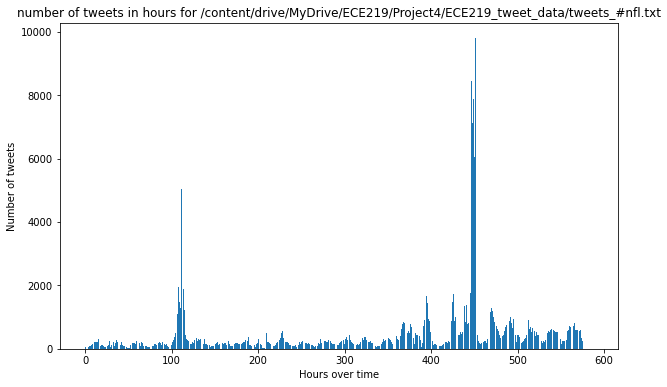

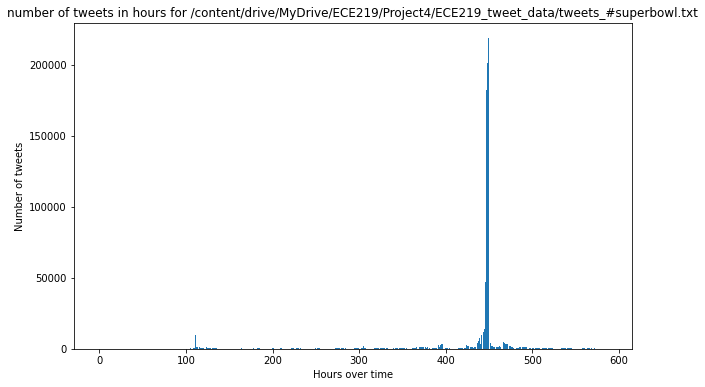

In [ ]:
q2_files = ['/content/drive/MyDrive/ECE219/Project4/ECE219_tweet_data/tweets_#nfl.txt','/content/drive/MyDrive/ECE219/Project4/ECE219_tweet_data/tweets_#superbowl.txt']

for file in q2_files:
    n_tweets = report_tweets(file)
    plt.figure(figsize=(10,6))
    plt.bar(range(len(n_tweets)),n_tweets)
    plt.xlabel('Hours over time')
    plt.ylabel('Number of tweets')
    plt.title('number of tweets in hours for '+file)

#Fanbase Prediction

In [6]:
# import json

# # exclude any tweets whose author is not from Washington or Massachusetts
# WA_substrings = ['Washington', 'Seattle', 'WA']
# MA_substrings = ['Massachusetts', 'Boston', 'MA']

# superbowl_dataset_trimmed = []

# with open('/content/drive/MyDrive/ECE219/Project4/ECE219_tweet_data/tweets_#superbowl.txt', 'r') as file:
#     lines = file.readlines()
    
#     for line in lines:
#         json_obj = json.loads(line)
#         location = json_obj['tweet']['user']['location']
        
#         for w in WA_substrings:
#             if w in location:
#                 superbowl_dataset_trimmed.append((json_obj['tweet']['text'], 'Washington'))
#                 break
                
#         for m in MA_substrings:
#             if m in location:
#                 superbowl_dataset_trimmed.append((json_obj['tweet']['text'], 'Massachusetts'))
#                 break
# # print(superbowl_dataset_trimmed)

In [2]:
###### to get the labels of the dataset 
# 1. Get the hashtags using Regex
# 2. Check pattern if in hawks or patriots
# 3. binary classification problem
# 4. Remove # from the tweet before passing it into the lemmatiser or count vectoriser 




import json


superbowl_dataset_trimmed = []

with open('/content/drive/MyDrive/ECE219/Project4/ECE219_tweet_data/tweets_#superbowl.txt', 'r') as file:
    lines = file.readlines()
    
    for line in lines:
        json_obj = json.loads(line)
        text = json_obj['tweet']['text']
        team_label=[]

        hash_val=[]
        hash_val1=[]

        hashtag=  re.findall(r"#(\w+)", text)

        hash = " ". join(hashtag)

        hash_val.append( re.findall(r"hawk(?i)", hash))
        

        hash_val1.append( re.findall(r"patriot(?i)", hash))
          

        if (hash_val[0] and not hash_val1[0]):
          team_label.append([1,0])
        elif(not hash_val[0] and hash_val1[0]):
          team_label.append([0,1])
        elif (not hash_val[0] and not hash_val1[0]):
          team_label.append([0,0])
        else:
          team_label.append([1,1])
        


        
        text = json_obj['tweet']['text'].replace("#"," ")
        superbowl_dataset_trimmed.append([text, team_label[0]])






        
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: Flags not at the start of the expression 'hawk(?i)'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: Flags not at the start of the expression 'patriot(?i)'


In [18]:

team=[]
team.append([1,0])
print(team[0])

[1, 0]


In [17]:
def clean(text):
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  if text=="":
    return ""
  texter = re.sub(r"<br />", " ", text)
  texter = re.sub(r"&quot;", "\"",texter)
  texter = re.sub('&#39;', "\"", texter)
  texter = re.sub('\n', " ", texter)
  texter = re.sub(' u '," you ", texter)
  texter = re.sub('`',"", texter)
  texter = re.sub(' +', ' ', texter)
  texter = re.sub(r"(!)\1+", r"!", texter)
  texter = re.sub(r"(\?)\1+", r"?", texter)
  texter = re.sub('&amp;', 'and', texter)
  texter = re.sub('\r', ' ',texter)
  clean = re.compile('<.*?>')
  texter = texter.encode('ascii', 'ignore').decode('ascii')
  texter = re.sub(clean, '', texter)
  
  return texter

In [39]:
# extract the labels out from this 
# remove those with [0,0] from this data

superbowl_dataset=[]
labels_superbowl = []
for data in superbowl_dataset_trimmed:


  if (data[1]!=[0,0] and data[1]!=[1,1]):
    
    superbowl_dataset.append(data[0])
    labels_superbowl.append(data[1])





(158153,)


In [42]:
import numpy as np
from sklearn.model_selection import train_test_split

# x_superbowl = np.array(superbowl_dataset_trimmed)[:, 0]
# y_superbowl = np.array(superbowl_dataset_trimmed)[:, 1]

# y_superbowl_binary = np.zeros(y_superbowl.shape)
# y_superbowl_binary[y_superbowl == 'Washington'] = 1

x_train, x_test, y_train, y_test = train_test_split(superbowl_dataset, labels_superbowl, test_size=0.2, random_state=42)

In [43]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from collections import defaultdict

# pos_tags: treebank to wordnet
tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

wnl = WordNetLemmatizer()
    
def lemmatize(data):
    lemmatized = []
    
    for doc in data:
        doc = clean(doc)
        tokens = word_tokenize(doc)
        words = [wnl.lemmatize(word, tag_map[tag[0]]) for word,tag in pos_tag(tokens) 
                 if wnl.lemmatize(word, tag_map[tag[0]]).isalpha()]
        sentence = ' '.join(words)
        lemmatized.append(sentence)
    return lemmatized

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

x_train_lemmatized = lemmatize(x_train)
x_test_lemmatized = lemmatize(x_test)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=3)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train_lemmatized)
x_test_tfidf = tfidf_vectorizer.transform(x_test_lemmatized)

svd = TruncatedSVD(n_components=50, random_state=42)
x_train_svd = svd.fit_transform(x_train_tfidf)
x_test_svd = svd.transform(x_test_tfidf)

In [45]:
print(x_train_svd.shape)
print(x_test_svd.shape)
print(np.array(y_train).shape)
print(np.array(y_test).shape)

(126522, 50)
(31631, 50)
(126522, 2)
(31631, 2)


## Perform Binary Classification task

In [51]:
# develop y labels 
y_train_label = []
y_test_label=[]
for label in y_train:
  if(label==[0,1]):
    y_train_label.append(0)
  else:
    y_train_label.append(1)

for label in y_test:
  if(label==[0,1]):
    y_test_label.append(0)
  else:
    y_test_label.append(1)


## Logistic Regression

In [55]:
# Logistic Regression: GridSearch
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import pandas as pd


grid_logistic = GridSearchCV(estimator=LogisticRegression(random_state=42), 
                        param_grid={'C':[10**-2,10**-1,10**0,10**1,10**2],
                                   'penalty': [ 'l2', 'none']}, 
                        cv=4, n_jobs=-1, verbose=1).fit(x_train_svd, y_train_label)

result_logistic = pd.DataFrame(grid_logistic.cv_results_)[['mean_test_score', 'param_C', 'param_penalty']]
result_logistic = result_logistic.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_logistic.head()

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,mean_test_score,param_C,param_penalty
0,0.980217,0.01,none
1,0.980217,0.1,none
2,0.980217,1,none
3,0.980217,10,none
4,0.980217,100,none


In [57]:
logistic_optim = LogisticRegression(penalty=grid_logistic.best_params_['penalty'], 
                                    C=grid_logistic.best_params_['C'], random_state=42)

logistic_optim.fit(x_train_svd, y_train_label)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=0.01, penalty='none', random_state=42)

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

y_pred_logistic = logistic_optim.predict(x_test_svd)
y_pred_prob_logistic = logistic_optim.predict_proba(x_test_svd)[:,1]

print('Logistic Regression:')
print('confusion_matrix:\n', confusion_matrix(y_test_label, y_pred_logistic))
print('accuracy:', accuracy_score(y_test_label, y_pred_logistic))
print('recall:', recall_score(y_test_label, y_pred_logistic))
print('precision:', precision_score(y_test_label, y_pred_logistic))
print('f1_score:', f1_score(y_test_label, y_pred_logistic))

Logistic Regression:
confusion_matrix:
 [[13426   381]
 [  229 17595]]
accuracy: 0.9807151212418197
recall: 0.9871521543985637
precision: 0.9788050734312417
f1_score: 0.9829608938547486


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


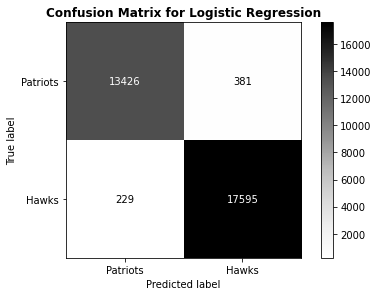

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

class_names = ['Patriots', 'Hawks']

plot_confusion_matrix(logistic_optim, x_test_svd, y_test_label, display_labels=class_names, 
                             values_format='d', cmap=plt.cm.Greys)
plt.tight_layout()
plt.title('Confusion Matrix for Logistic Regression', fontweight='bold')
plt.show()

## Random Forest

In [60]:
# RandomForest: GridSearch
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipe_rfc = Pipeline([
    ('standardize', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

param_grid = {
    'model__max_depth': [10, 30, 50, 70, 100, 200, None]
}


grid_rfc = GridSearchCV(pipe_rfc, param_grid=param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1, verbose=1)
grid_rfc.fit(x_train_svd, y_train_label)

result_rfc = pd.DataFrame(grid_rfc.cv_results_)[['mean_test_score', 'param_model__max_depth']]
result_rfc = result_rfc.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_rfc.head()

Fitting 5 folds for each of 7 candidates, totalling 35 fits


,mean_test_score,param_model__max_depth
0,0.979664,50
1,0.979664,70
2,0.979664,100
3,0.979664,200
4,0.979664,None


In [64]:
grid_rfc.best_params_

{'model__max_depth': 50}

In [65]:
rfc_optim = RandomForestClassifier(max_depth=grid_rfc.best_params_['model__max_depth'], 
                                    random_state=42)

rfc_optim.fit(x_train_svd, y_train_label)

RandomForestClassifier(max_depth=50, random_state=42)

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

y_pred_rfc = rfc_optim.predict(x_test_svd)
y_pred_prob_rfc = rfc_optim.predict_proba(x_test_svd)[:,1]

print('Random Forest Regression:')
print('confusion_matrix:\n', confusion_matrix(y_test_label, y_pred_rfc))
print('accuracy:', accuracy_score(y_test_label, y_pred_rfc))
print('recall:', recall_score(y_test_label, y_pred_rfc))
print('precision:', precision_score(y_test_label, y_pred_rfc))
print('f1_score:', f1_score(y_test_label, y_pred_rfc))

Random Forest Regression:
confusion_matrix:
 [[13539   268]
 [  347 17477]]
accuracy: 0.9805570484651134
recall: 0.980531867145422
precision: 0.9848971541279233
f1_score: 0.9827096629087126


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


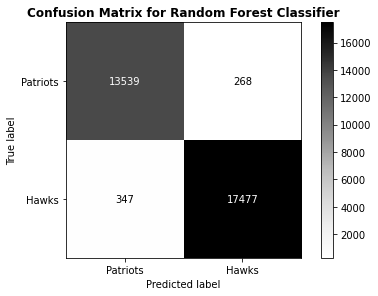

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

class_names = ['Patriots', 'Hawks']

plot_confusion_matrix(rfc_optim, x_test_svd, y_test_label, display_labels=class_names, 
                             values_format='d', cmap=plt.cm.Greys)
plt.tight_layout()
plt.title('Confusion Matrix for Random Forest Classifier', fontweight='bold')
plt.show()